## Summary:
This notebook demonstrates using the `WebMap` class's `update()` method to repair broken layers in a `Web Map` `Item`.  The referenced feature service was deleted and reprublished with a different name.

We will replace the `url` and `itemId` values in the operational layers with the new feature service values, and then update the `WebMap` object.

### Import necessary Libraries

In [3]:
from arcgis.gis import GIS
from arcgis.mapping import WebMap

In [4]:
gis = GIS(profile="your_profile")

###  Search for a Web Map

<Item title:"Middle Little Missouri SubBasin Wetlands Inventory Map" type:Web Map owner:your_username>
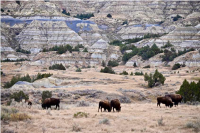

In [5]:
mlm_webmap_item = gis.content.search("<your_search_criteria>", item_type="Web Map")[0]
mlm_webmap_item

In [6]:
mlm_webmap_object = WebMap(mlm_webmap_item)
mlm_webmap_object

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

### Examine the current  Web Map Layers using the `definition` property
The definition returns a Python dictionary representation illustrating the use of the Web Map Specification.

{
  "operationalLayers": [
    {
      "id": "17f2e148f01-layer-3",
      "title": "WBD Middle Little Missouri Subbasin",
      "url": "https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/FeatureServer/6",
      "itemId": "c1c77acca8be49689e5b4a9b856af125",
      "layerType": "ArcGISFeatureLayer"
    },
    {
      "id": "17f2e148f03-layer-4",
      "title": "WBD Sub Watershed Boundaries",
      "url": "https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/FeatureServer/5",
      "itemId": "c1c77acca8be49689e5b4a9b856af125",
      "layerType": "ArcGISFeatureLayer"
    },
    {
      "id": "17f2e148f04-layer-6",
      "title": "Middle Little Missouri Riparian Areas",
      "url": "https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/FeatureServer/3",
      "itemId": "c1c77acca8be49689e5b4a9b856af125",
      "layerType": "ArcGISFeatureLayer"
    },
    {

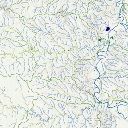

In [7]:
mlm_webmap_object.definition

### Inspect the keys in the dictionary:

In [8]:
list(mlm_webmap_object.definition.keys())

['operationalLayers',
 'tables',
 'baseMap',
 'authoringApp',
 'authoringAppVersion',
 'bookmarks',
 'initialState',
 'spatialReference',
 'version']

### Assign variables to the `operationalLayers` and `tables` components of the Web Map

In [9]:
op_layer_list = mlm_webmap_object.definition["operationalLayers"]
op_layer_list

[{'id': '17f2e148f01-layer-3',
  'title': 'WBD Middle Little Missouri Subbasin',
  'url': 'https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/FeatureServer/6',
  'itemId': 'c1c77acca8be49689e5b4a9b856af125',
  'layerType': 'ArcGISFeatureLayer'},
 {'id': '17f2e148f03-layer-4',
  'title': 'WBD Sub Watershed Boundaries',
  'url': 'https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/FeatureServer/5',
  'itemId': 'c1c77acca8be49689e5b4a9b856af125',
  'layerType': 'ArcGISFeatureLayer'},
 {'id': '17f2e148f04-layer-6',
  'title': 'Middle Little Missouri Riparian Areas',
  'url': 'https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/FeatureServer/3',
  'itemId': 'c1c77acca8be49689e5b4a9b856af125',
  'layerType': 'ArcGISFeatureLayer'},
 {'id': '17f2e148f05-layer-7',
  'title': 'Middle Little Missouri Wetlands',
  'url': 'https://your_portal.example.com/server/

In [10]:
op_table_list = mlm_webmap_object.definition["tables"]
op_table_list

[{'id': '17f2e148f07-layer-10',
  'title': 'NWI Code Definitions',
  'url': 'https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/FeatureServer/7',
  'itemId': 'c1c77acca8be49689e5b4a9b856af125',
  'popupInfo': {'popupElements': [{'type': 'fields'},
    {'type': 'attachments', 'displayType': 'auto'}],
   'showAttachments': True,
   'fieldInfos': [{'fieldName': 'objectid',
     'label': 'OBJECTID',
     'visible': False},
    {'fieldName': 'attribute',
     'isEditable': True,
     'label': 'ATTRIBUTE',
     'visible': True},
    {'fieldName': 'class_definition',
     'isEditable': True,
     'label': 'CLASS_DEFINITION',
     'visible': True},
    {'fieldName': 'class_name',
     'isEditable': True,
     'label': 'CLASS_NAME',
     'visible': True},
    {'fieldName': 'created_date',
     'format': {'dateFormat': 'longMonthDayYear', 'digitSeparator': False},
     'label': 'created_date',
     'visible': False},
    {'fieldName': 'created_user'

### Examine the information about the layers

In [11]:
for op_lyr in op_layer_list:
    print(f"{list(op_lyr.keys())}")

['id', 'title', 'url', 'itemId', 'layerType']
['id', 'title', 'url', 'itemId', 'layerType']
['id', 'title', 'url', 'itemId', 'layerType']
['id', 'title', 'url', 'itemId', 'layerType']
['id', 'title', 'url', 'itemId', 'layerType']
['id', 'title', 'url', 'itemId', 'layerType']
['id', 'title', 'url', 'itemId', 'layerType']


In [12]:
for layer in op_layer_list:
    print(f"{layer['title']:40}{layer['itemId']:36}\n  ...{layer['url']}")

WBD Middle Little Missouri Subbasin     c1c77acca8be49689e5b4a9b856af125    
  ...https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/FeatureServer/6
WBD Sub Watershed Boundaries            c1c77acca8be49689e5b4a9b856af125    
  ...https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/FeatureServer/5
Middle Little Missouri Riparian Areas   c1c77acca8be49689e5b4a9b856af125    
  ...https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/FeatureServer/3
Middle Little Missouri Wetlands         c1c77acca8be49689e5b4a9b856af125    
  ...https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/FeatureServer/2
Theodore Roosevelt National Park Boundariesc1c77acca8be49689e5b4a9b856af125    
  ...https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/FeatureServer/4
Populated Places 

### Examine the information about the tables

In [13]:
for op_tbl in op_table_list:
    print(f"{list(op_tbl.keys())}")

['id', 'title', 'url', 'itemId', 'popupInfo']


In [14]:
for op_tbl in op_table_list:
    print(f"{op_tbl['title']:40}{op_tbl['itemId']:36}\n  ...{op_tbl['url']}")

NWI Code Definitions                    c1c77acca8be49689e5b4a9b856af125    
  ...https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/FeatureServer/7


### Try to get Item based on Web Map layer's `itemId`

In [15]:
gis.content.get(op_layer_list[0]["itemId"])

### Try to query a Web Map layer based on url

In [16]:
from arcgis.features import FeatureLayer

for layer in op_layer_list:
    try:
        FeatureLayer(layer["url"], gis).query(return_count_only=True)
    except Exception as e:
        print(str(e))

Service MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/MapServer not found 
(Error Code: 404)
Service MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/MapServer not found 
(Error Code: 404)
Service MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/MapServer not found 
(Error Code: 404)
Service MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/MapServer not found 
(Error Code: 404)
Service MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/MapServer not found 
(Error Code: 404)
Service MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/MapServer not found 
(Error Code: 404)
Service MLM_Wetlands/MLM_Subbasin_Wetlands_Inventory/MapServer not found 
(Error Code: 404)


### Inspect the new feature service to replace incorrect values

<Item title:"MLM_Subbasin_and_Wetlands_Inventory" type:Feature Layer Collection owner:your_username>
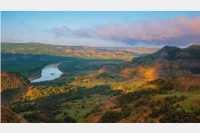

In [17]:
new_mlm_flyr = gis.content.search("MLM*", "Feature Layer")[0]
new_mlm_flyr

In [18]:
for flyr in new_mlm_flyr.layers:
    print(f"{flyr.properties.name:40}{flyr.properties.serviceItemId:36}{flyr.properties.id}\n  ...{flyr.url}")

Non_Populated_GNIS_Places               67f6ea4409d84334a48ef2c76966b52e    0
  ...https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_and_Wetlands_Inventory/FeatureServer/0
Populated_GNIS_Place_Names              67f6ea4409d84334a48ef2c76966b52e    1
  ...https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_and_Wetlands_Inventory/FeatureServer/1
Middle_Little_Missouri_Wetlands         67f6ea4409d84334a48ef2c76966b52e    2
  ...https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_and_Wetlands_Inventory/FeatureServer/2
Middle_Little_Missouri_Riparian_Areas   67f6ea4409d84334a48ef2c76966b52e    3
  ...https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_and_Wetlands_Inventory/FeatureServer/3
Theodore_Roosevelt_National_Park        67f6ea4409d84334a48ef2c76966b52e    4
  ...https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_and_Wetlands_Inventory/FeatureServ

In [19]:
for tlyr in new_mlm_flyr.tables:
    print(f"{tlyr.properties.name:40}{tlyr.properties.serviceItemId:36}{tlyr.properties.id}\n  ...{tlyr.url}")

NWI_Code_Definitions                    67f6ea4409d84334a48ef2c76966b52e    7
  ...https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_and_Wetlands_Inventory/FeatureServer/7


### Update the `url` and `itemId` keys in the `operationalLayers` 
Match the correct values from the new feature service to the `url` and `itemId` from the operationalLayers

In [ ]:
# Code illustrating that using the `title` key from the operationalLayers 
# and the `name` property from the Feature Service layer doesn't match values

# for op_lyr in op_layer_list:
#     count = len(new_mlm_flyr.layers)
#     for flyr in new_mlm_flyr.layers:
#         if op_lyr["title"] == flyr.properties.name:
#             print(f"{op_lyr['title']} matches new feature layer {flyr.properties.name}")
#             break
#         count -= 1
#     if count == 0:
#          print(f"{op_lyr['title']} does not match a feature layer in {new_mlm_flyr.title} service")

### Use the layer id from the url in the original layer to match the layer id in the new feature service layer
Use the Python dictionary `update()` method to replace the original `url` and `itemId` values in each layer

In [20]:
for op_lyr in op_layer_list:
    for flyr in new_mlm_flyr.layers:
        if int(op_lyr["url"][-1]) == flyr.properties.id:
            new_values_lyr = {"url": flyr.url,
                              "itemId": flyr.properties.serviceItemId}
            op_lyr.update(new_values_lyr)

In [21]:
for layer in op_layer_list:
    print(f"{layer['title']:40}{layer['itemId']:36}\n  ...{layer['url']}")

WBD Middle Little Missouri Subbasin     67f6ea4409d84334a48ef2c76966b52e    
  ...https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_and_Wetlands_Inventory/FeatureServer/6
WBD Sub Watershed Boundaries            67f6ea4409d84334a48ef2c76966b52e    
  ...https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_and_Wetlands_Inventory/FeatureServer/5
Middle Little Missouri Riparian Areas   67f6ea4409d84334a48ef2c76966b52e    
  ...https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_and_Wetlands_Inventory/FeatureServer/3
Middle Little Missouri Wetlands         67f6ea4409d84334a48ef2c76966b52e    
  ...https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_and_Wetlands_Inventory/FeatureServer/2
Theodore Roosevelt National Park Boundaries67f6ea4409d84334a48ef2c76966b52e    
  ...https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_and_Wetlands_Inventory/FeatureServer

### Use the table id from the url in the original layer to match the table id in the new feature service layer
Use the Python dictionary `update()` method to replace the original `url` and `itemId` values in each table

In [22]:
for op_tbl in op_table_list:
    for tbl in new_mlm_flyr.tables:
        if int(op_tbl["url"][-1]) == tbl.properties.id:
            new_values_tbl = {"url": tbl.url,
                              "itemId": tbl.properties.serviceItemId}
            op_tbl.update(new_values_tbl)

In [23]:
for tbl in op_table_list:
    print(f"{tbl['title']:40}{tbl['itemId']:36}\n  ...{tbl['url']}")

NWI Code Definitions                    67f6ea4409d84334a48ef2c76966b52e    
  ...https://your_portal.example.com/server/rest/services/MLM_Wetlands/MLM_Subbasin_and_Wetlands_Inventory/FeatureServer/7


### Update the `WebMap` object with the new values added to the `definition`

In [24]:
mlm_webmap_object.update()

True

### Reload the Web Map `Item` 

<Item title:"Middle Little Missouri SubBasin Wetlands Inventory Map" type:Web Map owner:your_username>
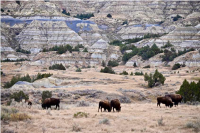

In [25]:
mlm_item_updated = gis.content.search("Subbasin*", item_type="Web Map")[0]
mlm_item_updated

In [26]:
mlm_wmo_updated = WebMap(mlm_item_updated)
mlm_wmo_updated

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))